In [20]:

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle

In [21]:
#Xu ly data
data1 = pd.read_csv("cauhoi_cautraloi_nganh.csv")
data2 = pd.read_csv("cauhoi_cautraloi_hocphi_hocbong.csv")
data = pd.concat([data1, data2], axis=0)
data = data.drop("stt",axis=1)
responses = {}
for index, row in data.iterrows():
    # In ra index và dữ liệu của từng dòng
    responses[row[2]] = row[1]
print(data)

C:\Users\thanh\AppData\Local\Temp\ipykernel_3356\328348989.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses[row[2]] = row[1]


                                          cauhoi  ...                        tags
0                                bảo hộ lao động  ...  gioithieunganhbaoholaodong
1                   Ngành bảo hộ lao động là gì?  ...  gioithieunganhbaoholaodong
2            Thông tin về ngành bảo hộ lao động?  ...  gioithieunganhbaoholaodong
3           Giới thiệu về ngành bảo hộ lao động?  ...  gioithieunganhbaoholaodong
4            Kỹ sư ngành bảo hộ lao động làm gì?  ...      nganhbaoholaodonglamgi
...                                          ...  ...                         ...
1741                         chi phí trung bình   ...                  hocphi2024
1742                chi phí trung bình 4 năm học  ...                  hocphi2024
1743               chi phí trung bình qua 4 năm   ...                  hocphi2024
1744               chi phí trung bình các ngành   ...                  hocphi2024
1745  chi phí trung bình ngành khoa học máy tính  ...                  hocphi2024

[2657 rows x 3 

In [22]:
print(data.isnull().sum())

cauhoi       0
cautraloi    0
tags         0
dtype: int64


In [23]:
data = data.sample(frac=1)

In [24]:
import string
#remove punctuations
data['cauhoi'] = data['cauhoi'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['cauhoi'] = data['cauhoi'].apply(lambda wrd: ''.join(wrd))


In [25]:
data['cauhoi']

1310    cho em hỏi chương trình tiêu chuẩn học phí tru...
437     ngành kỹ thuật điện tử viễn thông chương trình...
996     dạ cho em hỏi ngành ngôn ngữ trung quốc thuộc ...
1632    cho tôi hỏi mức học phí tạm thu của ngành quản...
1186    không biết ngành việt nam học chuyên ngành du ...
                              ...                        
939     học phí trung bình của chương trình tiêu chuẩn...
1217    học phí của chương trình tiêu chuẩn có học phí...
804                               văn hóa xã hội việt nam
1307    chương trình tiêu chuẩn học phí trung bình của...
12      sinh viên được đào tạo gì khi học ngành bảo hộ...
Name: cauhoi, Length: 2657, dtype: object

In [26]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cauhoi'])
train = tokenizer.texts_to_sequences(data['cauhoi'])

X_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])


In [27]:
X_train

array([[ 0,  0,  0, ...,  3,  8, 10],
       [ 0,  0,  0, ...,  3,  8, 10],
       [ 0,  0,  0, ..., 20,  1, 21],
       ...,
       [ 0,  0,  0, ..., 90, 69, 86],
       [ 0,  0,  0, ...,  3,  8, 10],
       [ 0,  0,  0, ..., 98, 65, 46]])

In [28]:
y_train

array([ 18, 157, 307, ..., 248,  18,  85])

In [29]:
input_shape =  X_train.shape[1]
print(X_train.shape)
print(input_shape)

(2657, 36)
36


In [30]:
#vocab là các từ trong bộ dữ liệu và output_length là số lượng tag
vocabulary = len(tokenizer.word_index)
print("number of unique words: ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words:  332
output length:  387


In [31]:
#Create model and train with epochs = 50
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

#train model
train = model.fit(X_train,y_train,epochs=50)


Epoch 1/50


84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.2162 - loss: 5.0558
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3496 - loss: 3.4297
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4058 - loss: 2.8900
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4275 - loss: 2.6479
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4666 - loss: 2.3741
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5239 - loss: 2.0958
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5666 - loss: 1.8759
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5987 - loss: 1.6884
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6370 - loss: 1.4704
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6793 - loss: 1.2940
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7201 - loss: 1.1115
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7561 - l

In [33]:
#Create model and train with epochs=100
i1 = Input(shape=(input_shape,))
x1 = Embedding(vocabulary+1,10)(i1)
x1 = LSTM(32, return_sequences=True)(x1)
x1 = Flatten()(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(output_length, activation="softmax")(x1)
model1 = Model(i1,x1)
model1.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
#train model
train1 = model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2291 - loss: 5.1601
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3511 - loss: 3.5489
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3535 - loss: 3.0910
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4156 - loss: 2.7284
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4832 - loss: 2.3411
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5286 - loss: 2.0848
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5664 - loss: 1.8314
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6525 - loss: 1.4514
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6778 - loss: 1.2781
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7373 - loss: 1.0636
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7478 - loss: 0.9578
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step

In [34]:
#Create model and train with epochs=250
i2 = Input(shape=(input_shape,))
x2 = Embedding(vocabulary+1,32)(i2)
x2 = LSTM(32, return_sequences=True)(x2)
x2 = Dropout(0.2)(x2)
x2 = Flatten()(x2)
x2 = Dense(output_length, activation="softmax")(x2)
model2 = Model(i2,x2)
model2.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
#train model
train2 = model2.fit(X_train,y_train,epochs=200)

Epoch 1/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2372 - loss: 5.0330
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3730 - loss: 3.2072
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4387 - loss: 2.6868
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5400 - loss: 2.1896
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5931 - loss: 1.8853
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6509 - loss: 1.5552
Epoch 7/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6863 - loss: 1.3257
Epoch 8/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7482 - loss: 0.9979
Epoch 9/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7749 - loss: 0.8650
Epoch 10/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8243 - loss: 0.6831
Epoch 11/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8468 - loss: 0.6436
Epoch 12/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step

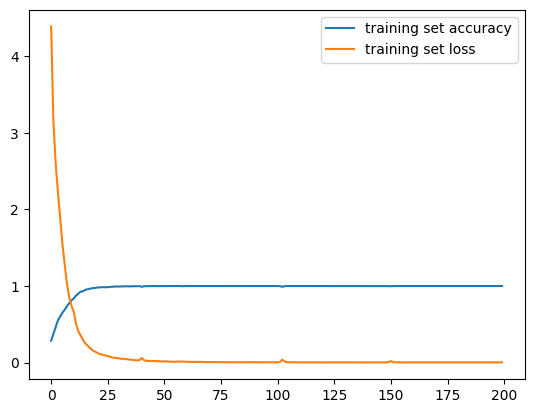

In [35]:
#Accuracy of the model
plt.plot(train2.history['accuracy'], label='training set accuracy')
plt.plot(train2.history['loss'],label='training set loss')
plt.legend()

In [36]:
model2.save('model_QA.keras')

In [37]:
with open("variable.pkl", "wb") as f:
    # Ghi dữ liệu
    pickle.dump(tokenizer, f)
    pickle.dump(le, f)
    pickle.dump(responses, f)
    pickle.dump(input_shape, f)
    pickle.dump(vocabulary, f)
    pickle.dump(output_length, f)

In [38]:
# pip install underthesea